<a href="https://colab.research.google.com/github/Jassmine11/cfpb-complaints-project/blob/main/CFPB_Data%20Wrangling%20%26%20Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load and inspect the data**

In [16]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
!pip install gdown


In [18]:
import gdown

url = "https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu"
output = "consumer_complaints.csv"

gdown.download(url, output, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu
From (redirected): https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu&confirm=t&uuid=162c3aec-ca9b-4b29-977f-6e68da4161c7
To: /content/consumer_complaints.csv
100%|██████████| 1.41G/1.41G [00:15<00:00, 89.5MB/s]


'consumer_complaints.csv'

In [19]:
import gdown
import zipfile
import os
import pandas as pd

# Step 1: Download the ZIP file from Google Drive
url = "https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu"
output_zip = "consumer_complaints.zip"
gdown.download(url, output_zip, quiet=False)

# Step 2: Unzip the file
extract_folder = './consumer_complaints/'
os.makedirs(extract_folder, exist_ok=True)

with zipfile.ZipFile(output_zip, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Step 3: Check extracted files
extracted_files = os.listdir(extract_folder)
print("Extracted files:", extracted_files)

# Step 4: Load the CSV (assuming single CSV in zip)
csv_file = os.path.join(extract_folder, extracted_files[0])

# Step 5: Read a sample from the CSV (to avoid memory issues)
df_sample = pd.read_csv(csv_file, nrows=100000)
print(df_sample.head())

# Keep raw data untouched
df_raw = df_sample.copy()

# Use df_clean as the single working dataframe
df_clean = df_sample.copy()

print("Working dataset shape:", df_clean.shape)

Downloading...
From (original): https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu
From (redirected): https://drive.google.com/uc?id=1UCLpDLu_kzoSKGWer8Hp8DXGE0yy3XWu&confirm=t&uuid=6797191d-a481-460c-b579-e6f547e3d2f6
To: /content/consumer_complaints.zip
100%|██████████| 1.41G/1.41G [00:21<00:00, 65.8MB/s]


Extracted files: ['complaints.csv']
  Date received                                            Product  \
0    2025-07-20                                    Debt collection   
1    2025-08-07  Credit reporting or other personal consumer re...   
2    2025-08-06  Credit reporting or other personal consumer re...   
3    2025-08-07  Credit reporting or other personal consumer re...   
4    2025-08-06  Credit reporting or other personal consumer re...   

        Sub-product                                 Issue  \
0       Rental debt             Electronic communications   
1  Credit reporting           Improper use of your report   
2  Credit reporting  Incorrect information on your report   
3  Credit reporting           Improper use of your report   
4  Credit reporting           Improper use of your report   

                                           Sub-issue  \
0  You told them to stop contacting you, but they...   
1      Reporting company used your report improperly   
2       

## Step 5: Data Wrangling Overview

In this section, I clean and prepare the CFPB consumer complaints dataset for NLP modeling
and Retrieval-Augmented Generation (RAG). This includes handling missing values, duplicates,
outliers, and preparing a clean dataset for downstream modeling.


In [20]:
# Check missing values
df_clean.isna().mean().sort_values(ascending=False).head(20)

Consumer disputed?              0.97061
Tags                            0.94949
Consumer complaint narrative    0.73139
Company public response         0.68471
Consumer consent provided?      0.49103
Sub-issue                       0.04514
Sub-product                     0.00980
State                           0.00332
ZIP code                        0.00110
Date received                   0.00000
Product                         0.00000
Issue                           0.00000
Company                         0.00000
Submitted via                   0.00000
Date sent to company            0.00000
Company response to consumer    0.00000
Timely response?                0.00000
Complaint ID                    0.00000
dtype: float64

In [21]:
drop_cols = [
    "Consumer disputed?",
    "Tags",
    "Company public response",
    "Consumer consent provided?"
]

df_clean = df_clean.drop(columns=[c for c in drop_cols if c in df_clean.columns])


In [22]:
TEXT_COL = "Consumer complaint narrative"

df_clean = df_clean[df_clean[TEXT_COL].notna()].copy()
df_clean[TEXT_COL] = df_clean[TEXT_COL].astype(str).str.strip()
df_clean = df_clean[df_clean[TEXT_COL] != ""]


In [23]:
fill_unknown = ["Sub-issue", "Sub-product", "State", "ZIP code"]

for col in fill_unknown:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna("Unknown")


In [24]:
# Check data types and summary info
#df_clean.info()

In [25]:
# Check for missing values and duplicates
#df_clean.isnull().sum()
#df_clean.duplicated().sum()

In [26]:
# check shape ( rows and columns)
# look at column names
# check data types and missing values

print("Shape:", df_clean.shape)
print("\nColumns:", df_clean.columns.tolist())
print("\nData types:\n", df_clean.dtypes)
print("\nMissing values per column:\n", df_clean.isnull().sum())


Shape: (26861, 14)

Columns: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company', 'State', 'ZIP code', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Complaint ID']

Data types:
 Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company                         object
State                           object
ZIP code                        object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Complaint ID                     int64
dtype: object

Missing values per column:
 Date received                   0
Product                         0
Sub-product                     0
Issue                      

### Post-Cleaning Data Summary

After data wrangling:
- The dataset contains 26,861 complaint records with complete narrative text.
- All remaining columns have zero missing values.
- High-missing and low-utility columns were removed earlier.
- The dataset is now suitable for NLP modeling and Retrieval-Augmented Generation (RAG).

This cleaned dataset will be used in subsequent steps for text classification,
embedding generation, and compliance-aware analysis.


In [47]:
before = df_clean.shape[0]
df_clean = df_clean.drop_duplicates()
print("Duplicates removed:", before - df_clean.shape[0])


Duplicates removed: 0


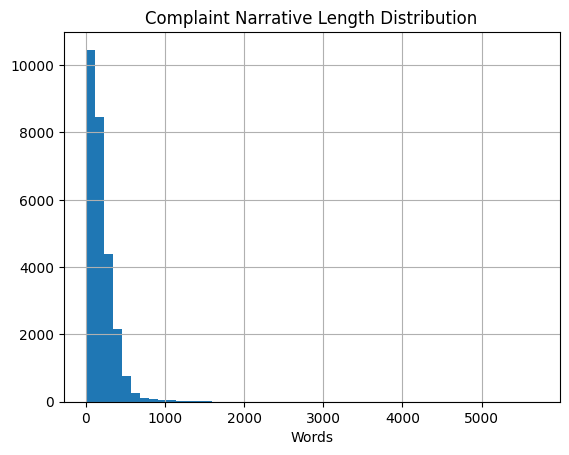

In [48]:
df_clean["text_len_words"] = df_clean["Consumer complaint narrative"].str.split().str.len()
df_clean["text_len_words"].describe()

df_clean["text_len_words"].hist(bins=50)
plt.title("Complaint Narrative Length Distribution")
plt.xlabel("Words")
plt.show()


In [49]:
df_clean.to_csv("cfpb_cleaned_step5.csv", index=False)


In [50]:
# Flag short and long complaint narratives
SHORT_THRESHOLD = 20
LONG_THRESHOLD = 800

df_clean["is_short"] = df_clean["text_len_words"] < SHORT_THRESHOLD
df_clean["is_long"] = df_clean["text_len_words"] > LONG_THRESHOLD

# Percentage of flagged records
(df_clean[["is_short", "is_long"]].mean() * 100).rename("percent_flagged")


is_short    2.326793
is_long     0.997729
Name: percent_flagged, dtype: float64

### Outlier Analysis (Complaint Narrative Length)

The complaint narrative length distribution is highly right-skewed.
Most complaints are under a few hundred words, while a small number
extend to several thousand words.

Very short complaints (<20 words) may lack sufficient semantic content
for NLP modeling and may be excluded from certain models.

Very long complaints (>800 words) may exceed transformer or LLM token
limits. These will not be removed; instead, they will be chunked in
later steps to support Retrieval-Augmented Generation (RAG).

For this step, outliers are flagged rather than blindly removed.


In [51]:
# Final duplicate check (even if zero)
df_clean = df_clean.drop_duplicates()

# Export cleaned dataset
df_clean.to_csv("cfpb_cleaned_step5.csv", index=False)


### Outlier Summary

Approximately 2.3% of complaint narratives are very short (<20 words) and may contain
limited semantic information for modeling.

Approximately 1.0% of narratives are very long (>800 words) and may exceed token limits
for transformer-based models or LLMs.

Rather than removing these records, outliers are flagged for special handling in later
steps. Short narratives may be excluded from certain models, while long narratives will
be chunked to support Retrieval-Augmented Generation (RAG).


In [52]:
df_clean["text_len_words"].describe()


count    26861.000000
mean       191.438926
std        182.924825
min          2.000000
25%         83.000000
50%        148.000000
75%        259.000000
max       5701.000000
Name: text_len_words, dtype: float64

**Data** **Cleaning**


In [28]:
#Fill common missing values
df = df_clean.copy()
for col in ['Sub-product', 'Sub-issue', 'ZIP code', 'State']:
    df_clean[col] = df[col].fillna('Unknown')

### Narrative Length Statistics

The average complaint narrative length is approximately 191 words, with a median of 148 words.
This confirms that most narratives are of moderate length and suitable for NLP modeling.

The distribution is right-skewed, with a small number of very long narratives (maximum 5,701 words),
which will require chunking in later LLM-based steps. Very short narratives are relatively rare and
have already been flagged for potential exclusion in certain models.


**Analysis**

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from textblob import TextBlob
import missingno as msno
import geopandas as gpd
import plotly.express as px
from scipy.stats import chi2_contingency

In [30]:

# Assuming your dataframe is df_sample
df = df_sample.copy()

/tmp/ipython-input-996048823.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="Set2")


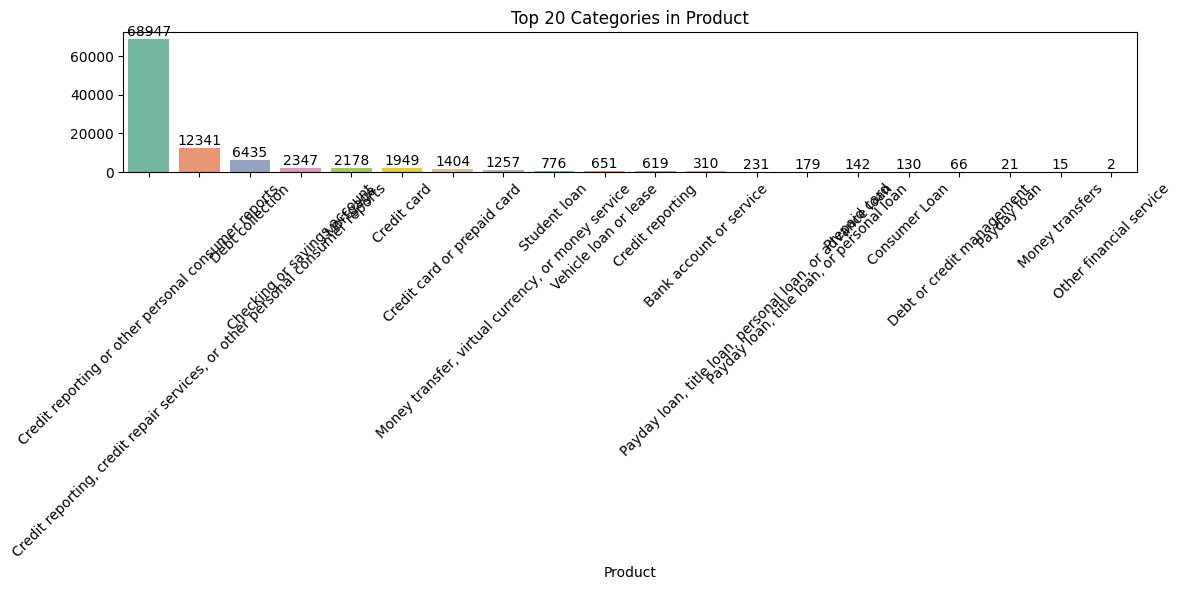

/tmp/ipython-input-996048823.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="Set2")


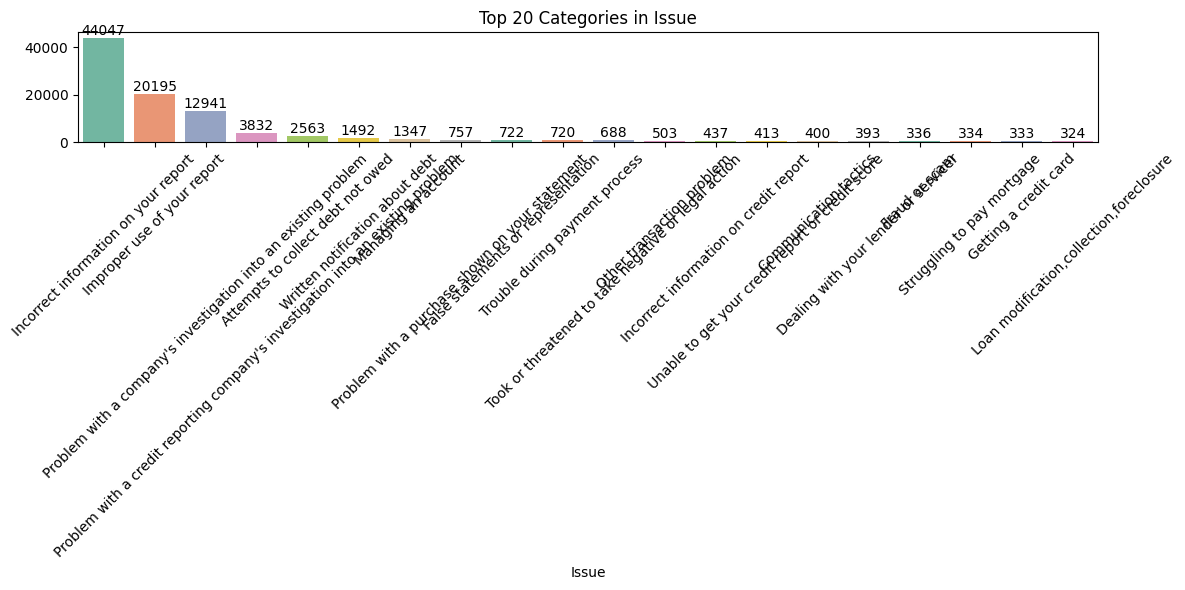

/tmp/ipython-input-996048823.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="Set2")


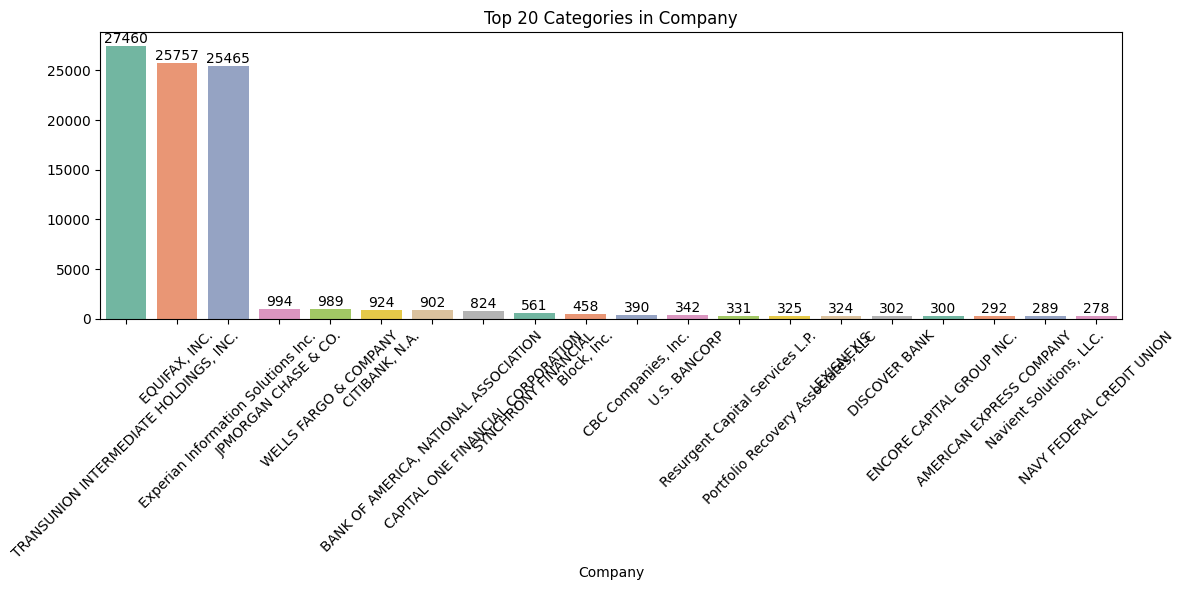

/tmp/ipython-input-996048823.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=counts.index, y=counts.values, palette="Set2")


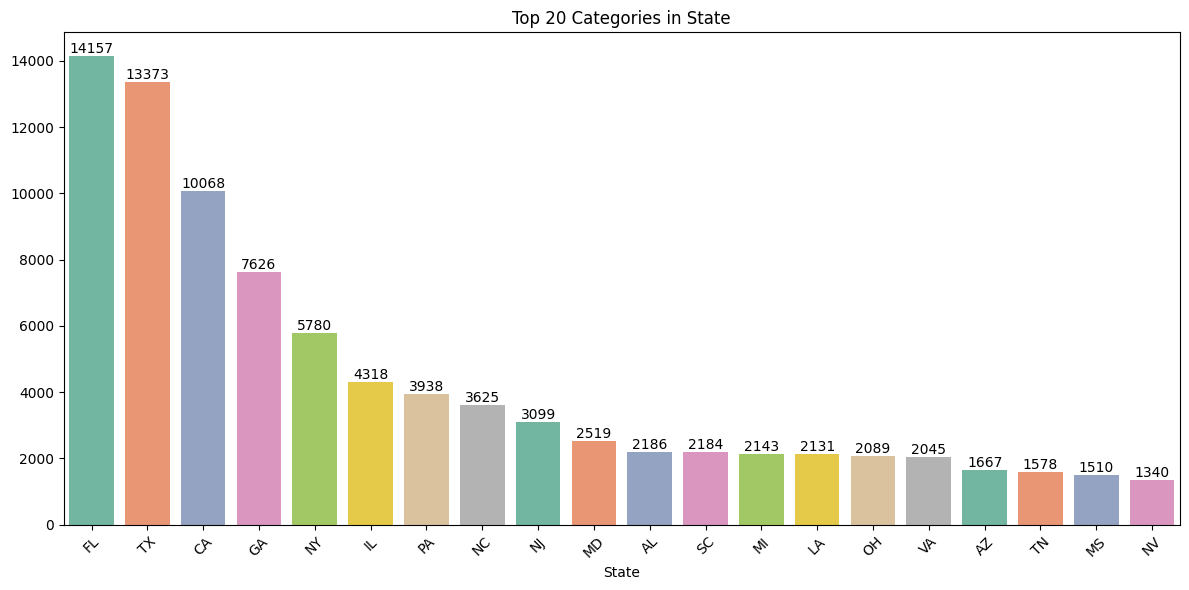

In [31]:
#Enhanced categorical plots with value labels
def plot_count_with_labels(df, col, top_n=20):
    plt.figure(figsize=(12,6))
    counts = df[col].value_counts().nlargest(top_n)
    ax = sns.barplot(x=counts.index, y=counts.values, palette="Set2")
    plt.title(f"Top {top_n} Categories in {col}")
    plt.xticks(rotation=45)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x()+p.get_width()/2., p.get_height()),
                    ha='center', va='bottom', fontsize=10)
    plt.tight_layout()
    plt.show()

for col in ['Product', 'Issue', 'Company', 'State']:
    if col in df.columns:
        plot_count_with_labels(df, col)

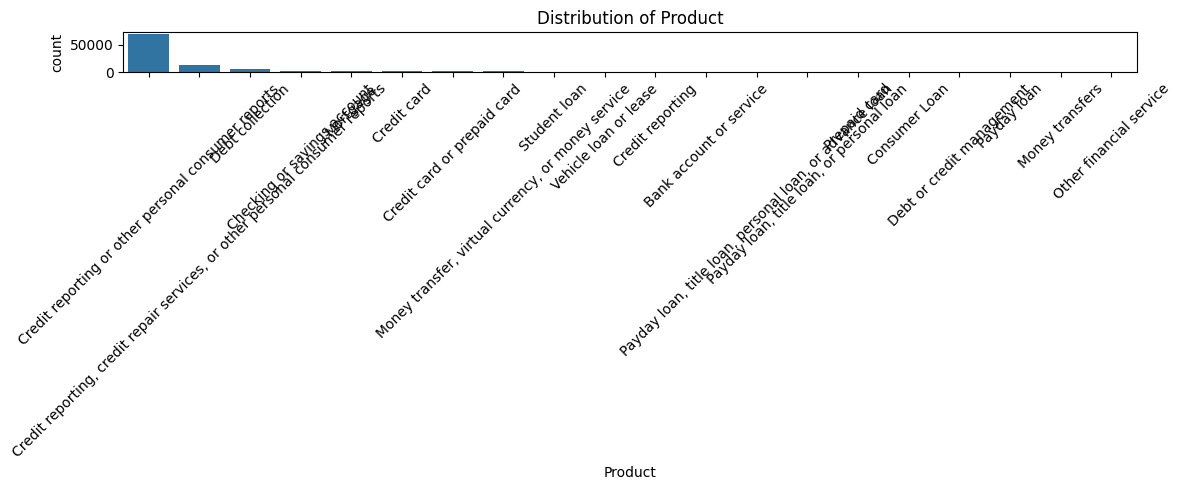

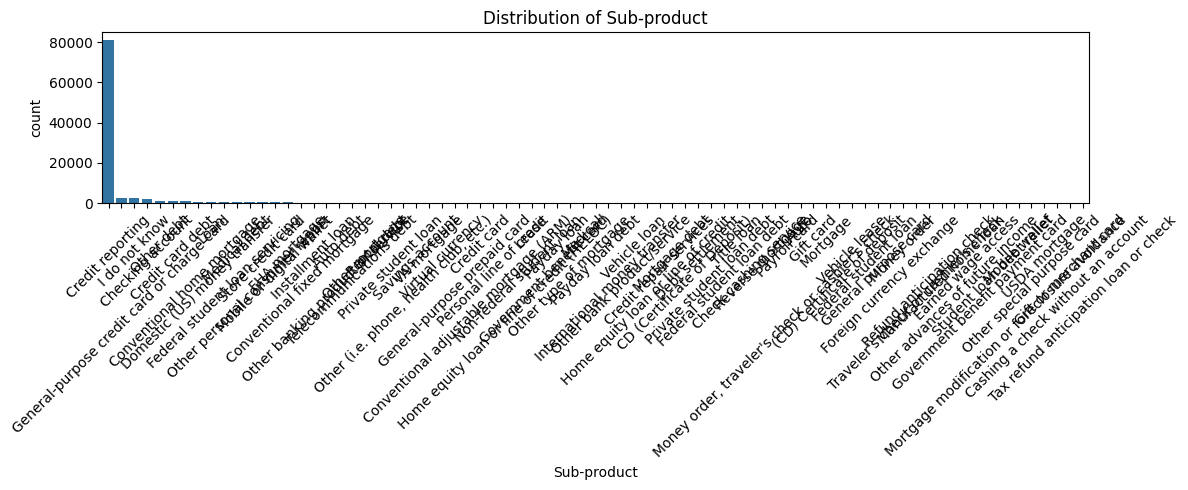

/tmp/ipython-input-3369581745.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


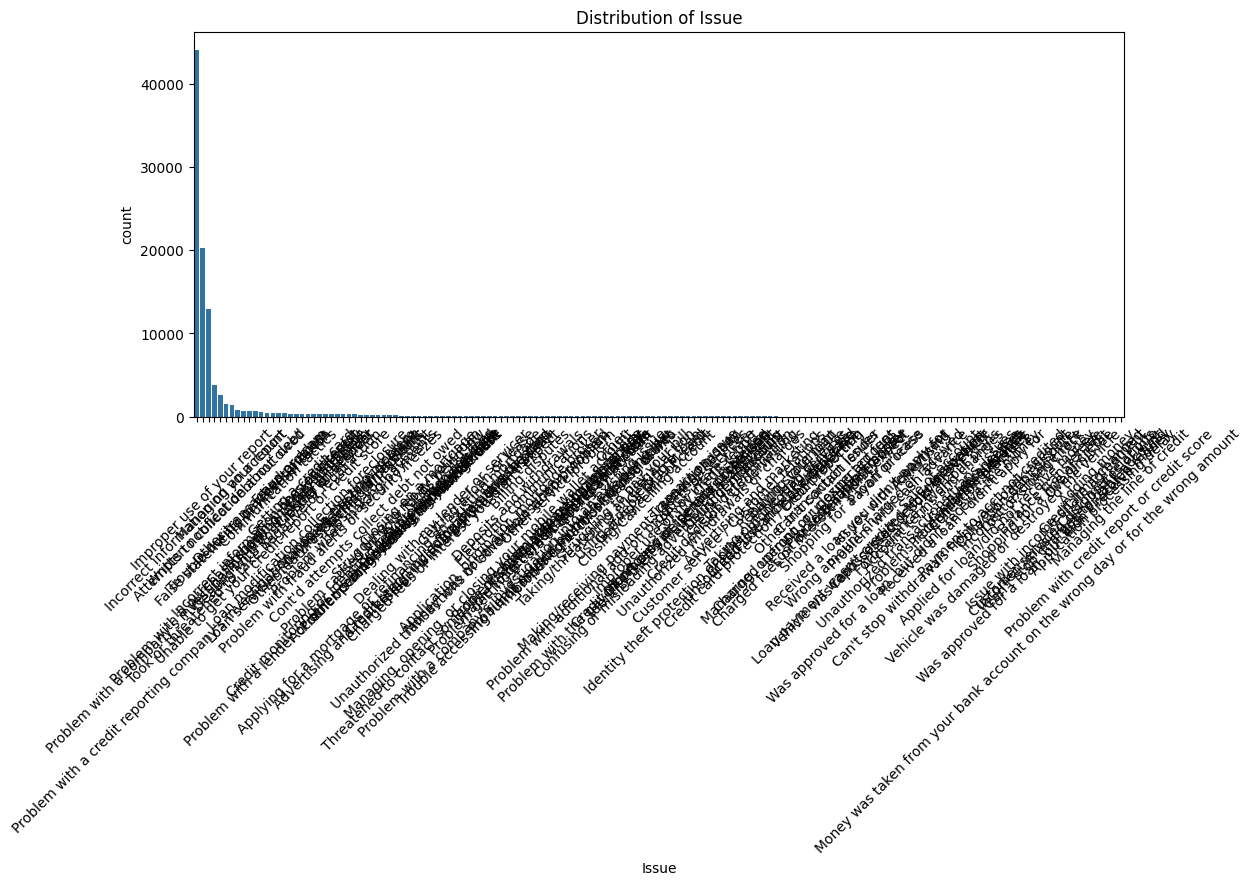

/tmp/ipython-input-3369581745.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


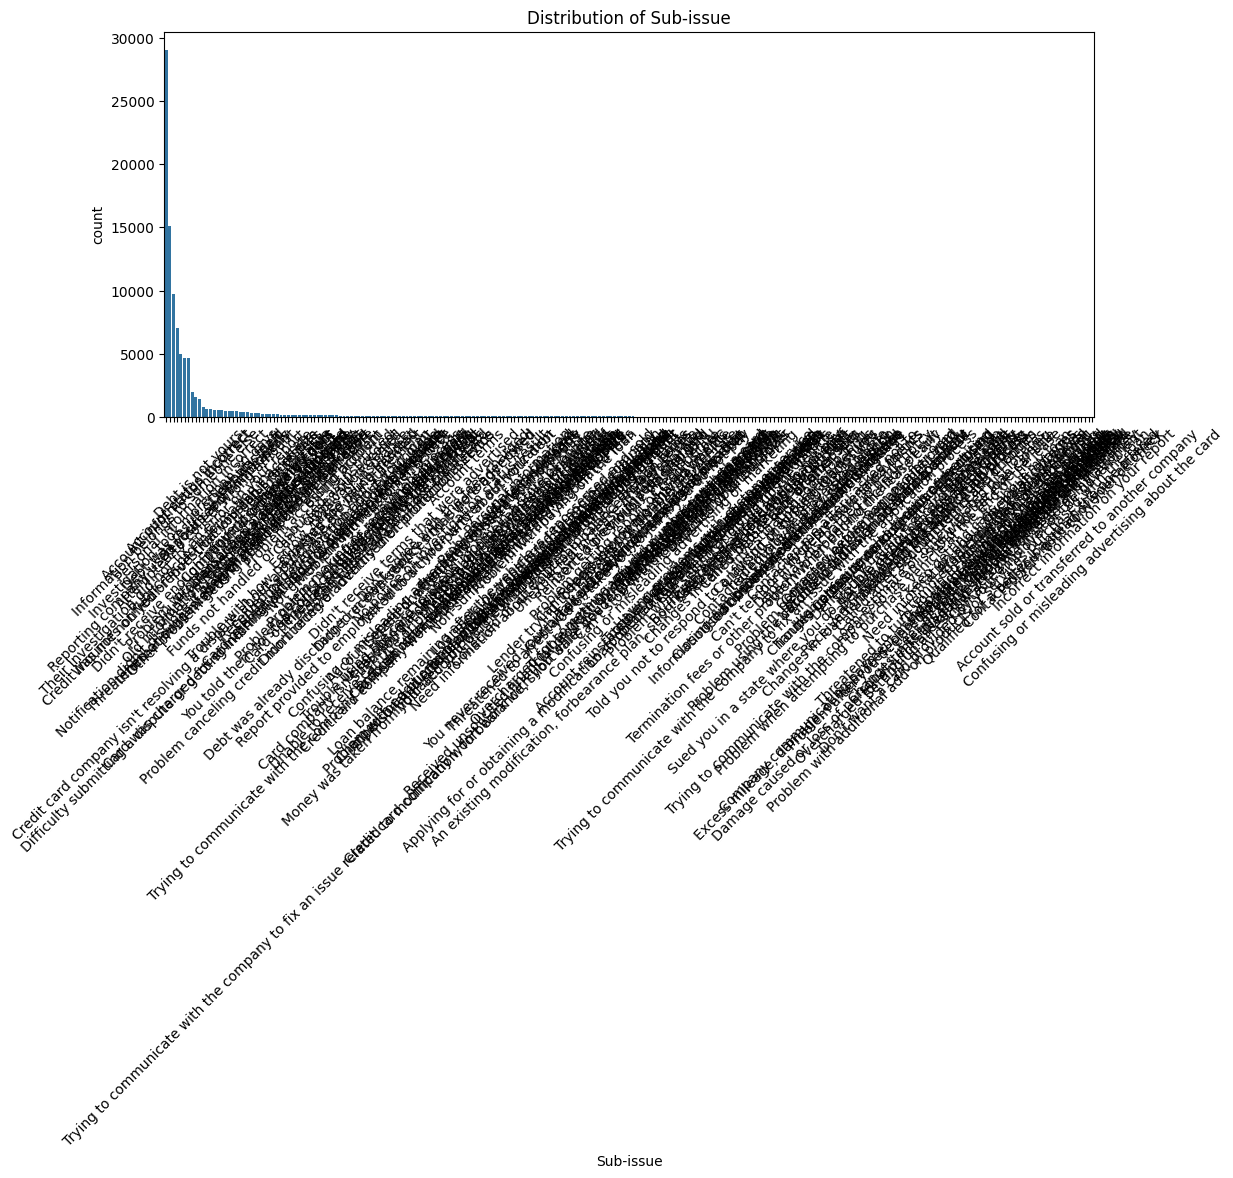

/tmp/ipython-input-3369581745.py:12: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


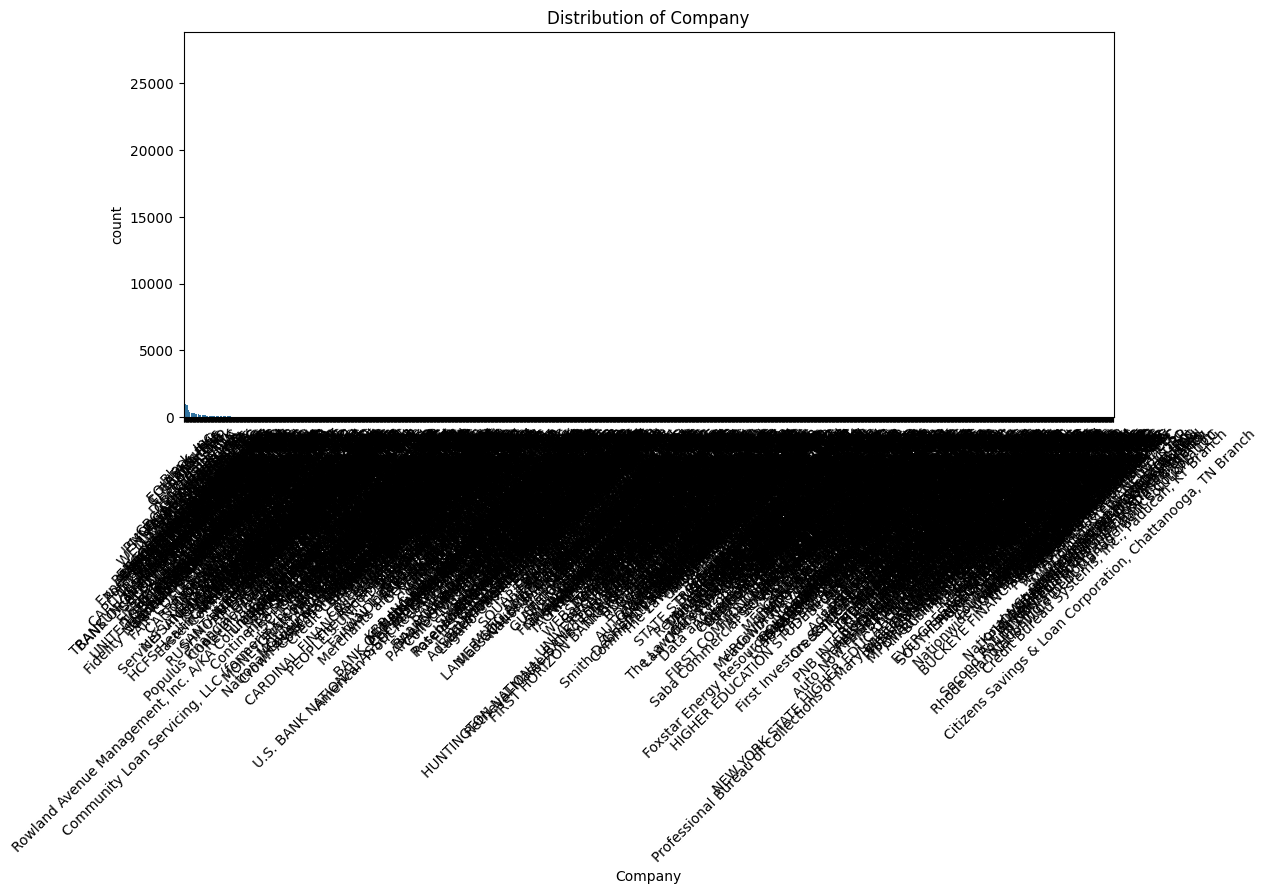

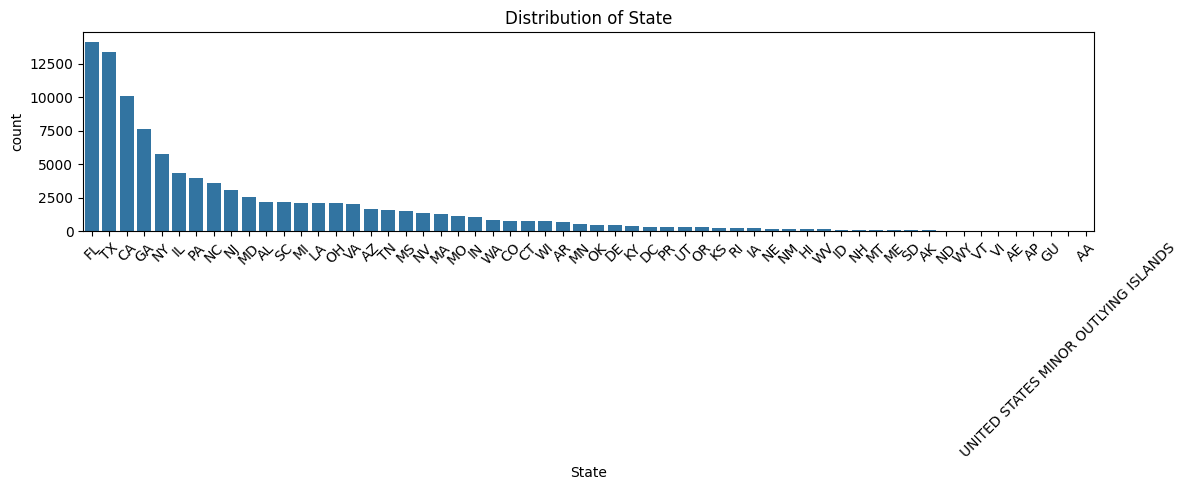

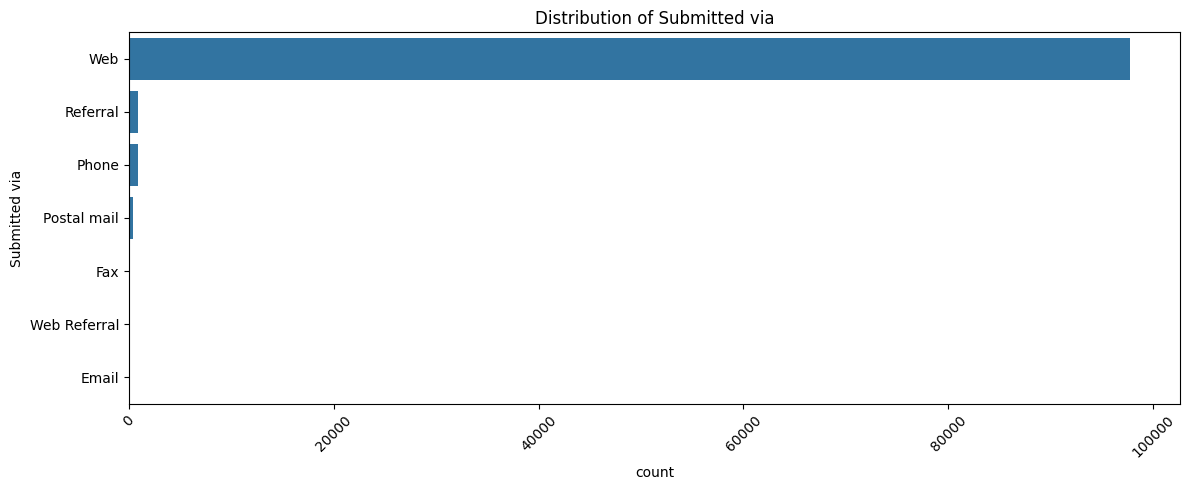

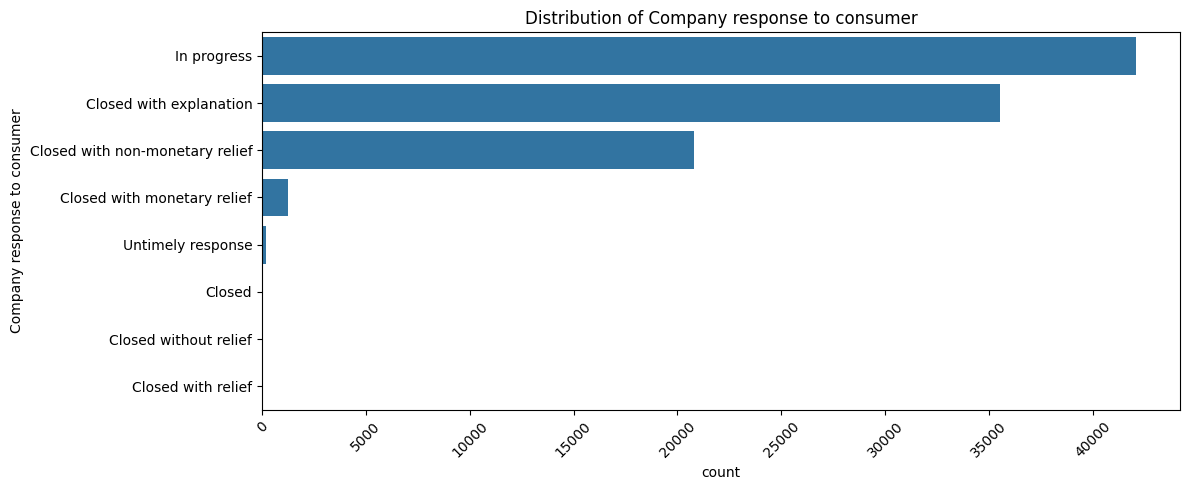

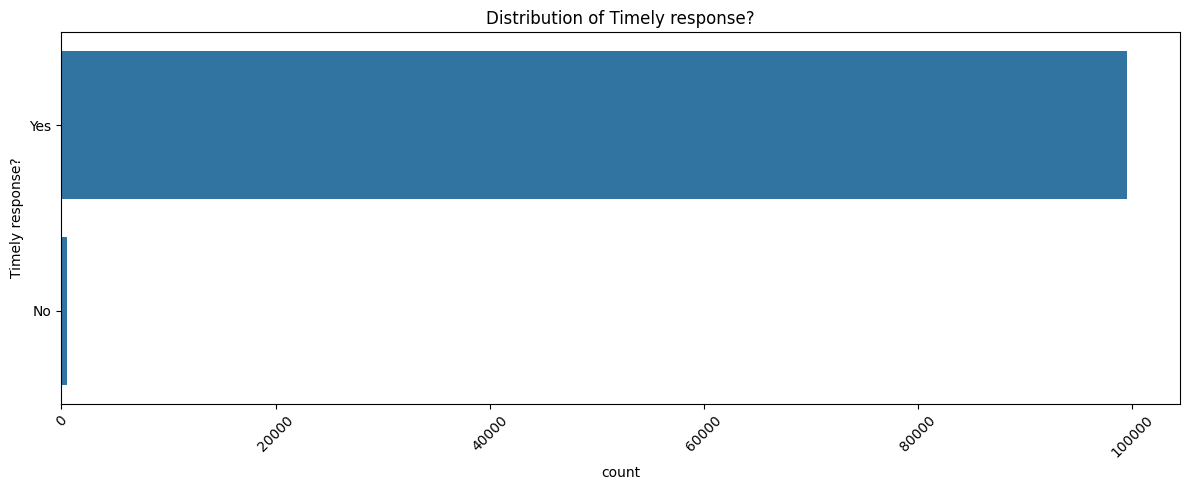

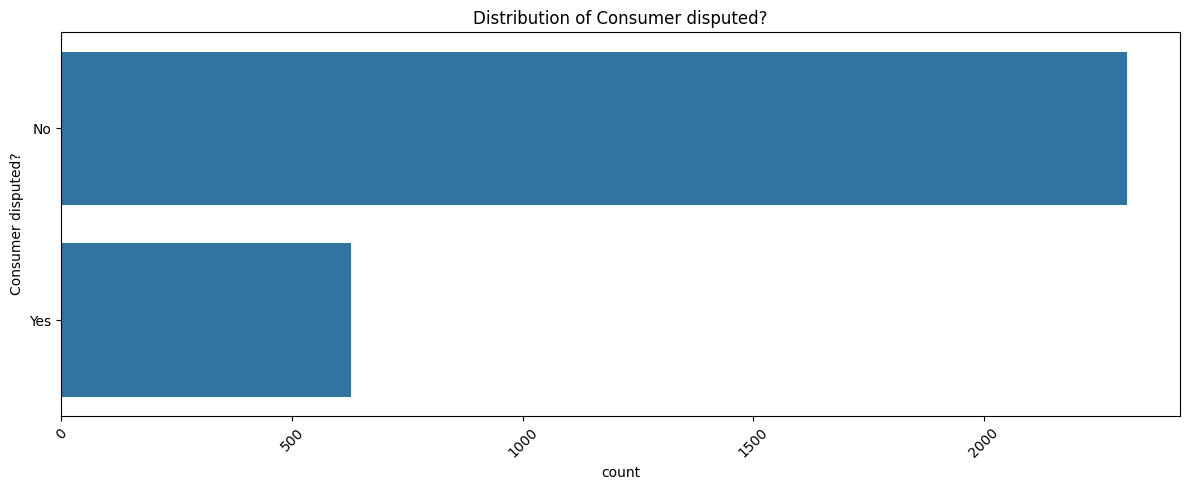

In [32]:
# Enhanced categorical plots with value labels

cat_vars = ['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Company', 'State',
            'Submitted via', 'Company response to consumer', 'Timely response?', 'Consumer disputed?']
for col in cat_vars:
    if col in df.columns:
        plt.figure(figsize=(12,5))
        order = df[col].value_counts().index
        sns.countplot(data=df, y=col if df[col].nunique() < 20 else None, x=col if df[col].nunique() >= 20 else None, order=order)
        plt.title(f"Distribution of {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

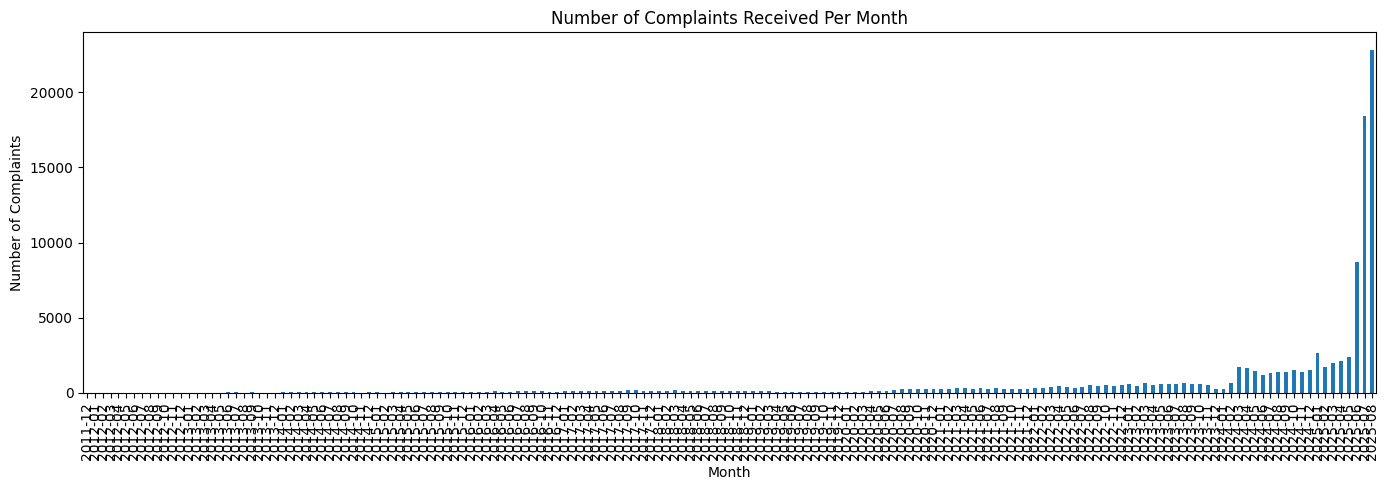

In [33]:
#Distribution of Date Variables

# Convert date columns to datetime
date_cols = ['Date received', 'Date sent to company']
for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Plot number of complaints over time
if 'Date received' in df.columns:
    plt.figure(figsize=(14,5))
    df['Date received'].dt.to_period('M').value_counts().sort_index().plot(kind='bar')
    plt.title('Number of Complaints Received Per Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Complaints')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

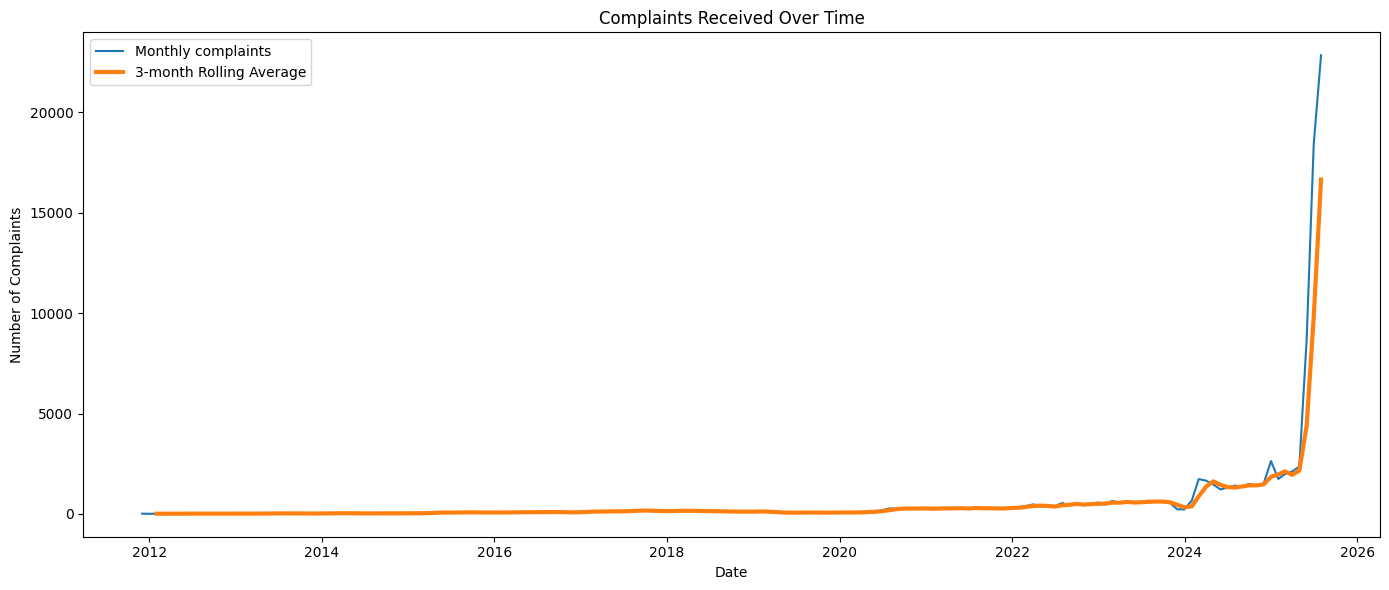

In [34]:
 #Time trend with rolling average of complaints received monthly
if 'Date received' in df.columns:
    df['Date received'] = pd.to_datetime(df['Date received'], errors='coerce')
    monthly_counts = df.groupby(df['Date received'].dt.to_period('M')).size().to_frame('counts')
    monthly_counts.index = monthly_counts.index.to_timestamp()

    plt.figure(figsize=(14,6))
    plt.plot(monthly_counts.index, monthly_counts['counts'], label='Monthly complaints')
    plt.plot(monthly_counts.index, monthly_counts['counts'].rolling(window=3).mean(), label='3-month Rolling Average', linewidth=3)
    plt.title('Complaints Received Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Complaints')
    plt.legend()
    plt.tight_layout()
    plt.show()

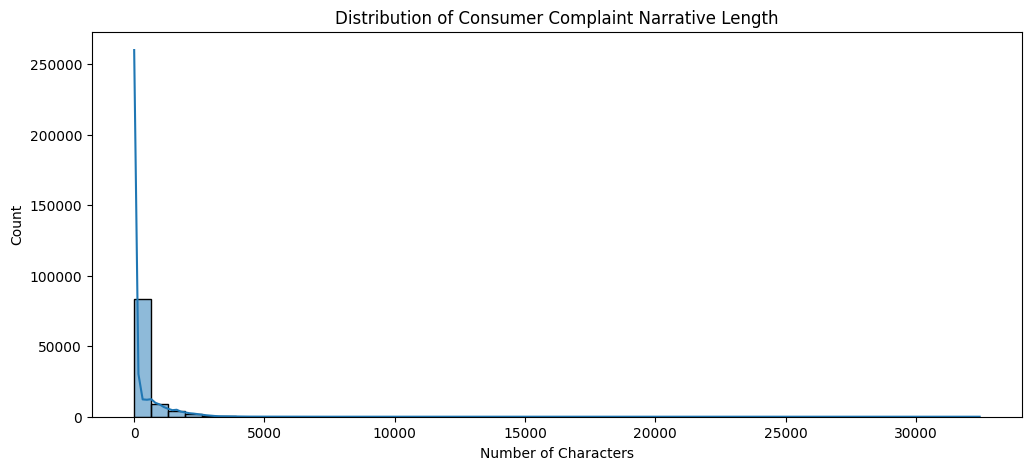

In [35]:
 #Text Length Analysis for Consumer complaint narrative

if 'Consumer complaint narrative' in df.columns:
    df['narrative_length'] = df['Consumer complaint narrative'].fillna('').apply(len)
    plt.figure(figsize=(12,5))
    sns.histplot(df['narrative_length'], bins=50, kde=True)
    plt.title('Distribution of Consumer Complaint Narrative Length')
    plt.xlabel('Number of Characters')
    plt.show()

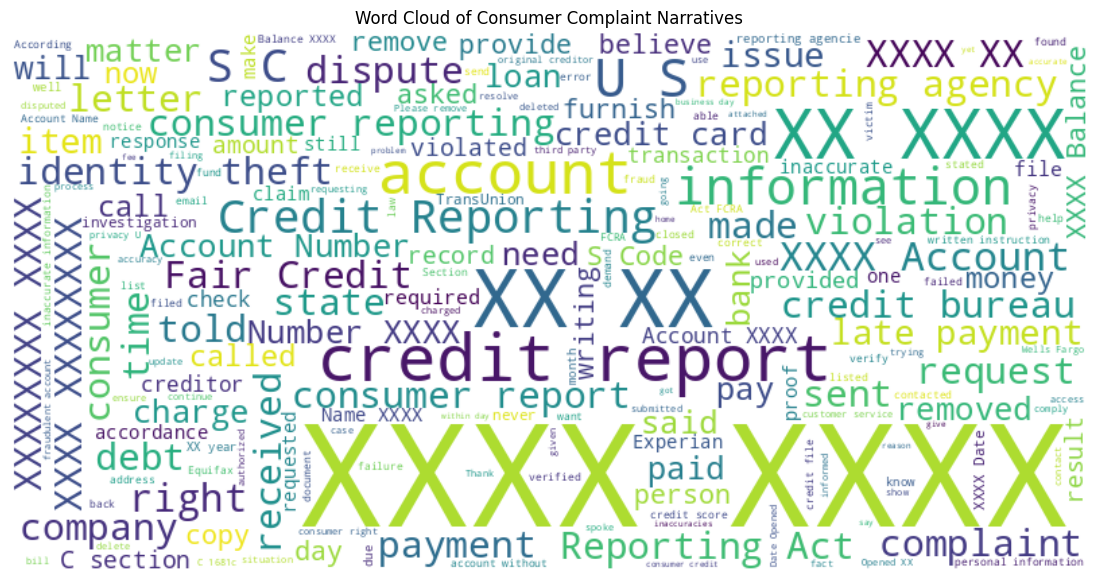

In [36]:
#Complaint narrative text analysis: Word cloud and sentiment

# Combine all narratives into one large text
narratives = df['Consumer complaint narrative'].dropna().str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(narratives)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Consumer Complaint Narratives')
plt.show()

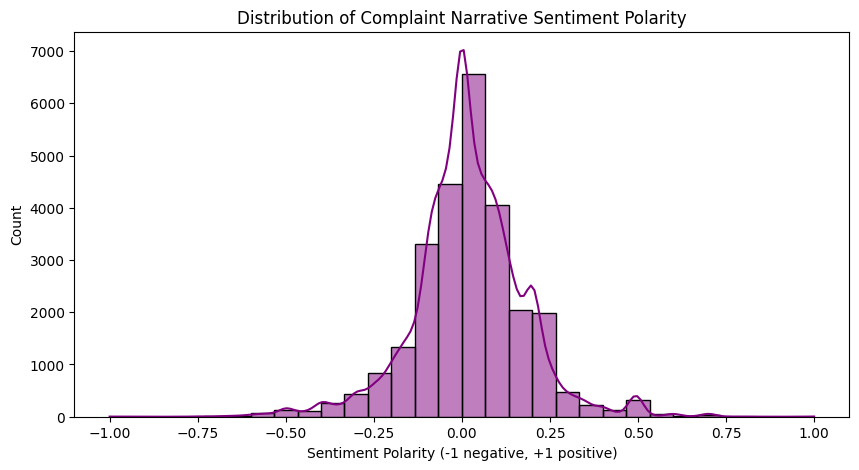

In [37]:
#Sentiment analysis (TextBlob)
def get_sentiment(text):
    if pd.isna(text) or text.strip() == '':
        return np.nan
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['Consumer complaint narrative'].apply(get_sentiment)

plt.figure(figsize=(10,5))
sns.histplot(df['sentiment'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribution of Complaint Narrative Sentiment Polarity')
plt.xlabel('Sentiment Polarity (-1 negative, +1 positive)')
plt.show()

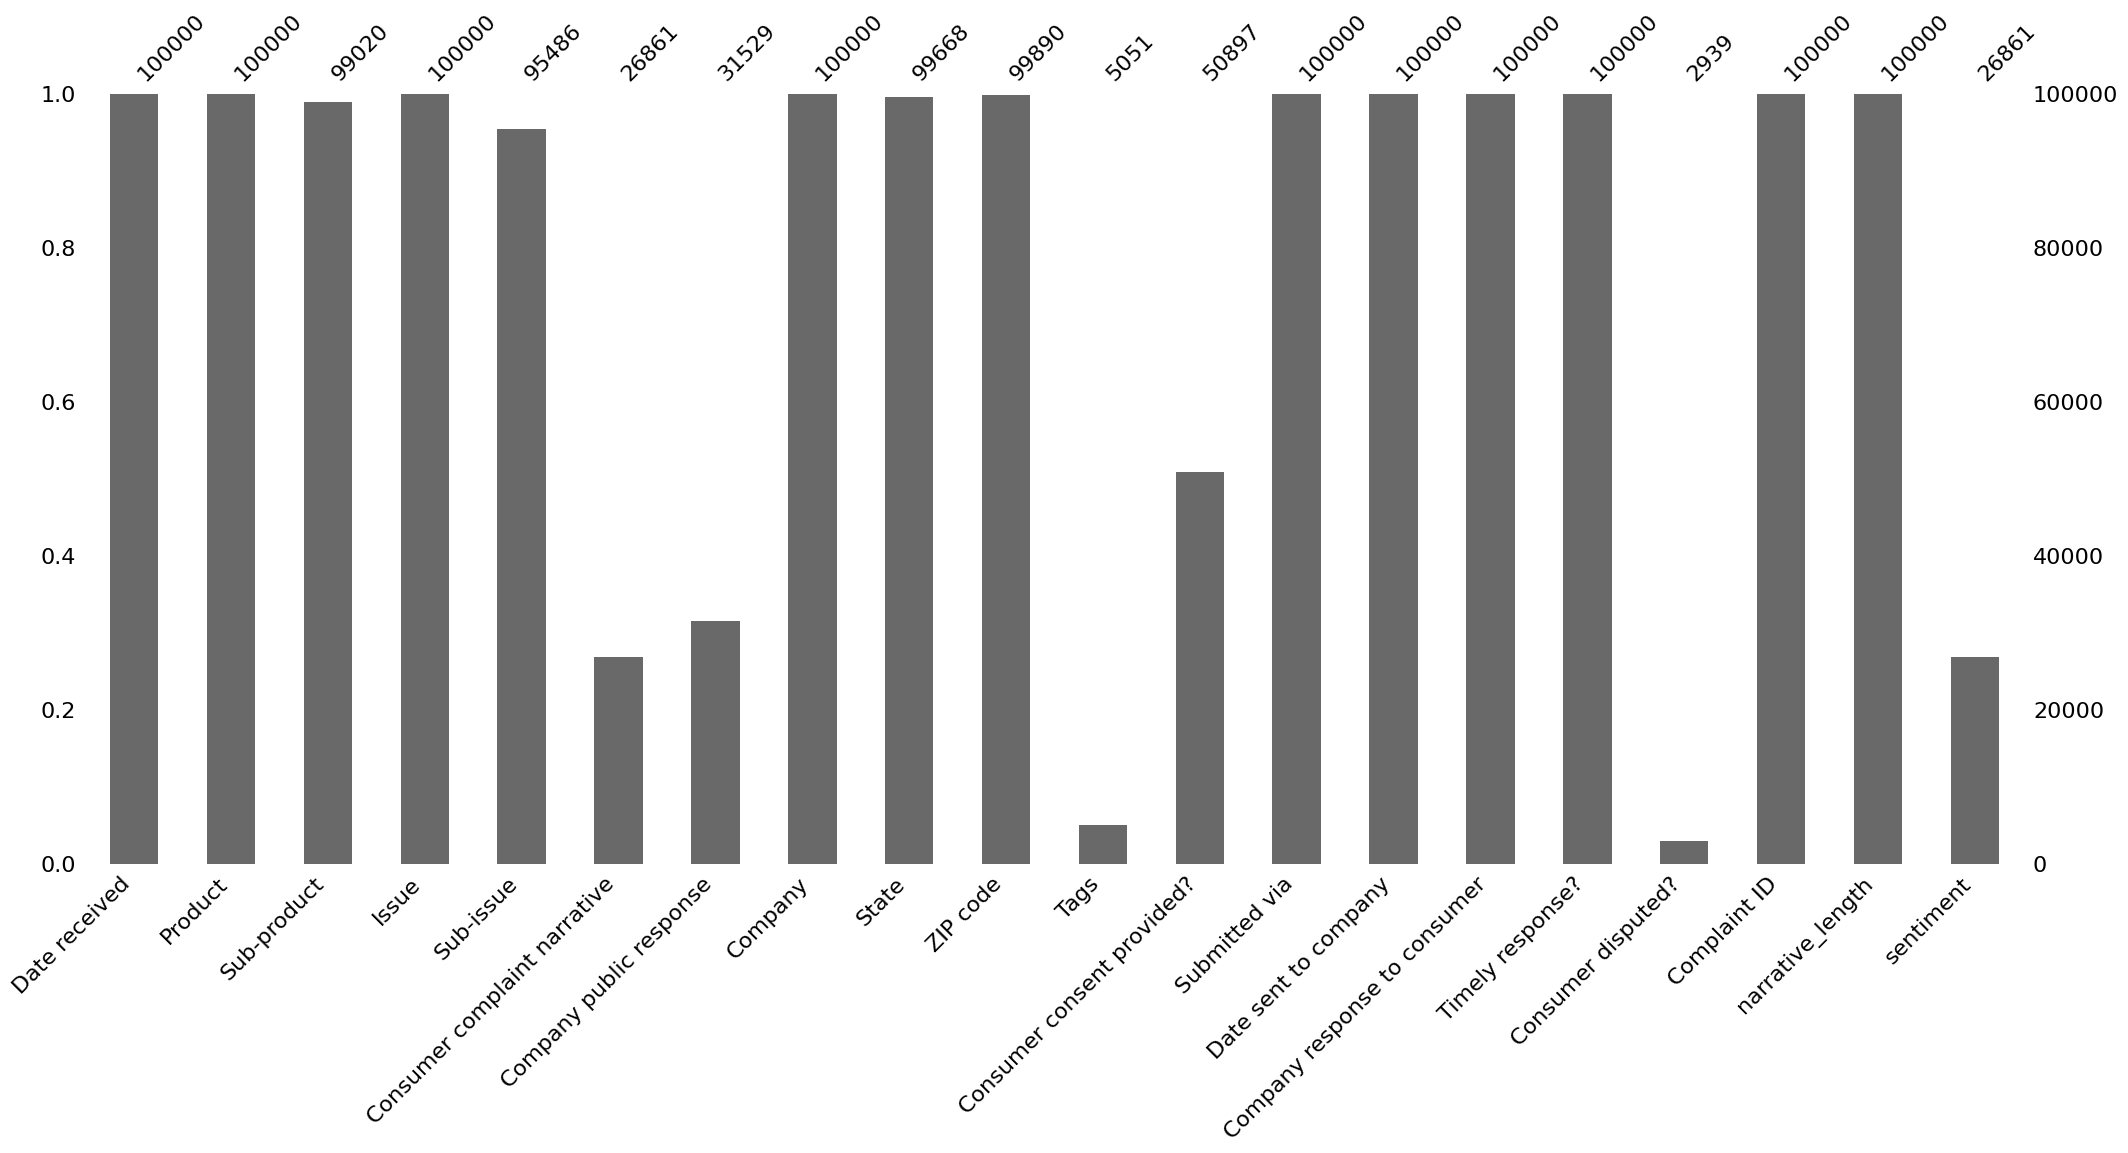

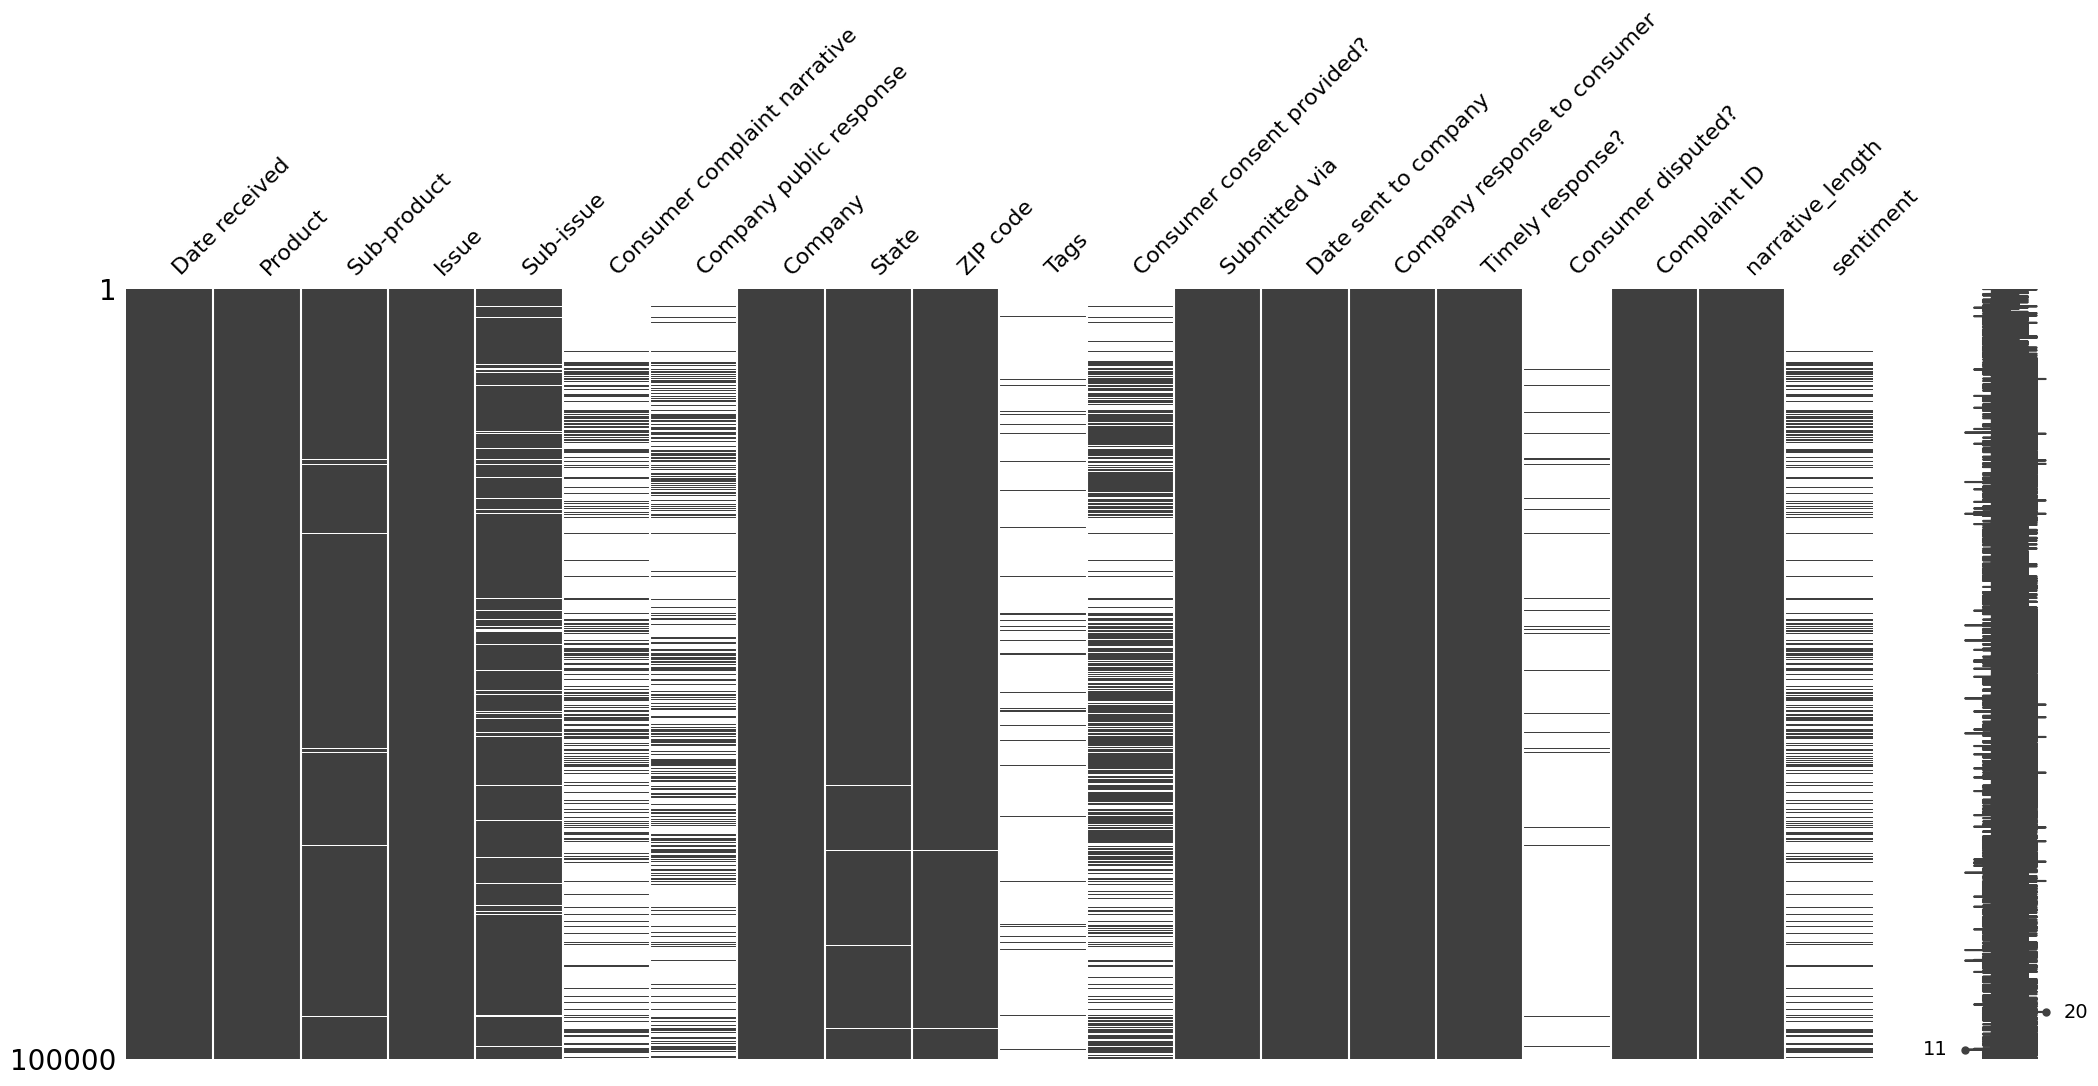

In [38]:
# Missing Values Visualization

import missingno as msno
msno.bar(df)
plt.show()

msno.matrix(df)
plt.show()


Percentage Distribution of Company Responses by Product:
 Company response to consumer                           Closed  \
Product                                                         
Bank account or service                              4.193548   
Checking or savings account                          0.000000   
Consumer Loan                                        1.538462   
Credit card                                          0.051308   
Credit card or prepaid card                          0.000000   
Credit reporting                                     0.484653   
Credit reporting or other personal consumer rep...   0.000000   
Credit reporting, credit repair services, or ot...   0.000000   
Debt collection                                      0.341880   
Debt or credit management                            0.000000   
Money transfer, virtual currency, or money service   0.000000   
Money transfers                                      0.000000   
Mortgage                       

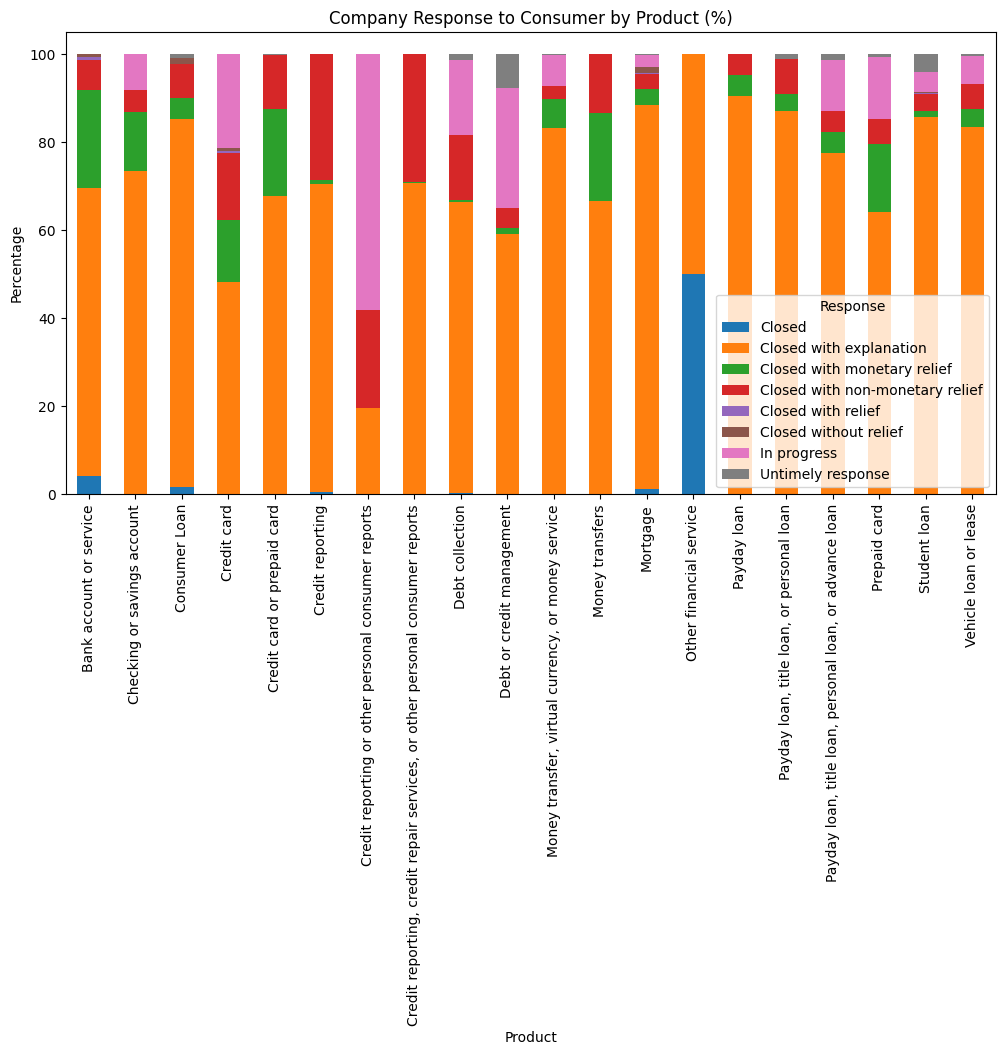

In [39]:
# Cross-tabulations & Relationships

# Complaints by Product and Company Response
if all(x in df.columns for x in ['Product', 'Company response to consumer']):
    cross_tab = pd.crosstab(df['Product'], df['Company response to consumer'], normalize='index') * 100
    print("\nPercentage Distribution of Company Responses by Product:\n", cross_tab)

    cross_tab.plot(kind='bar', stacked=True, figsize=(12,6))
    plt.title('Company Response to Consumer by Product (%)')
    plt.ylabel('Percentage')
    plt.legend(title='Response')
    plt.show()

Chi-square test for Product vs Company Response: chi2=48803.45, p-value=0.0000


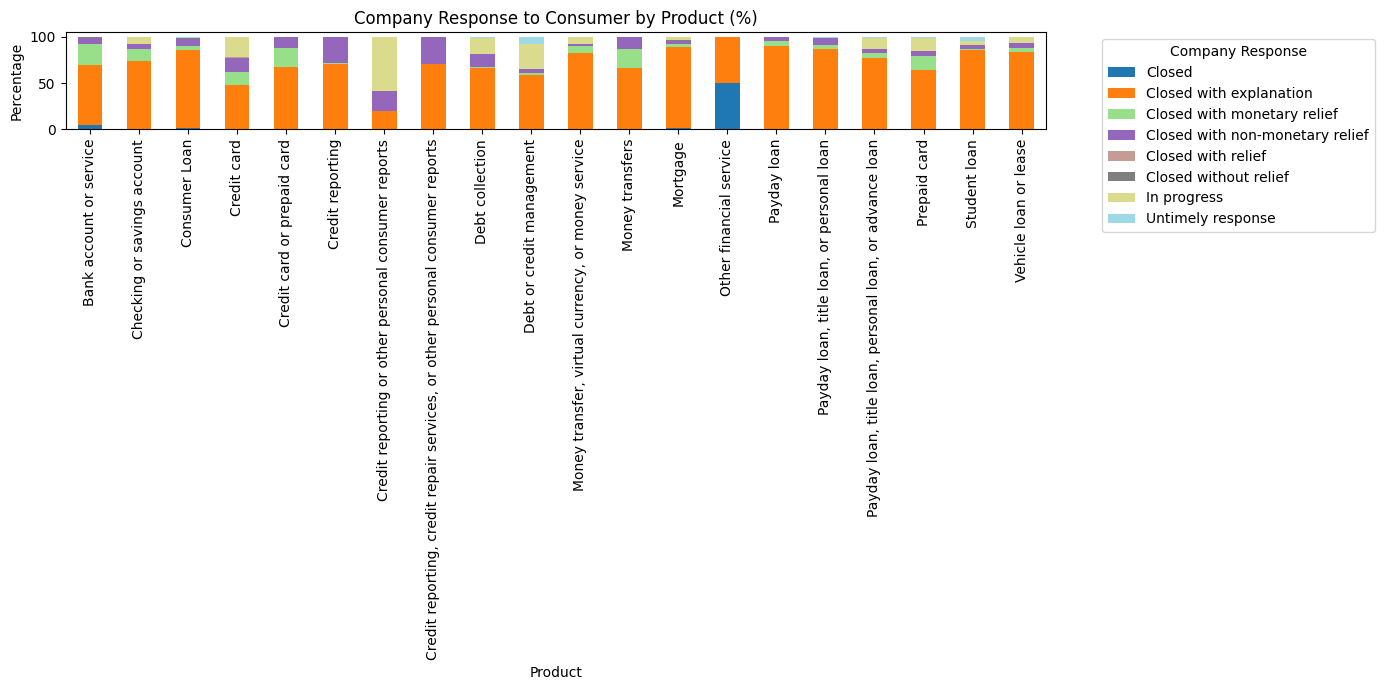

In [40]:
#Cross-tab with chi-square test: Product vs Company Response
if all(x in df.columns for x in ['Product', 'Company response to consumer']):
    cross_tab = pd.crosstab(df['Product'], df['Company response to consumer'])
    chi2, p, dof, ex = chi2_contingency(cross_tab)
    print(f"Chi-square test for Product vs Company Response: chi2={chi2:.2f}, p-value={p:.4f}")
    cross_tab_norm = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100
    cross_tab_norm.plot(kind='bar', stacked=True, figsize=(14,7), colormap='tab20')
    plt.title('Company Response to Consumer by Product (%)')
    plt.ylabel('Percentage')
    plt.legend(title='Company Response', bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.show()


Percentage of Timely Responses by Product:
 Timely response?                                           No         Yes
Product                                                                  
Bank account or service                              3.225806   96.774194
Checking or savings account                          0.766937   99.233063
Consumer Loan                                       10.000000   90.000000
Credit card                                          0.513084   99.486916
Credit card or prepaid card                          0.997151   99.002849
Credit reporting                                     0.161551   99.838449
Credit reporting or other personal consumer rep...   0.091375   99.908625
Credit reporting, credit repair services, or ot...   0.405154   99.594846
Debt collection                                      3.465423   96.534577
Debt or credit management                           12.121212   87.878788
Money transfer, virtual currency, or money service   1.113763   98.

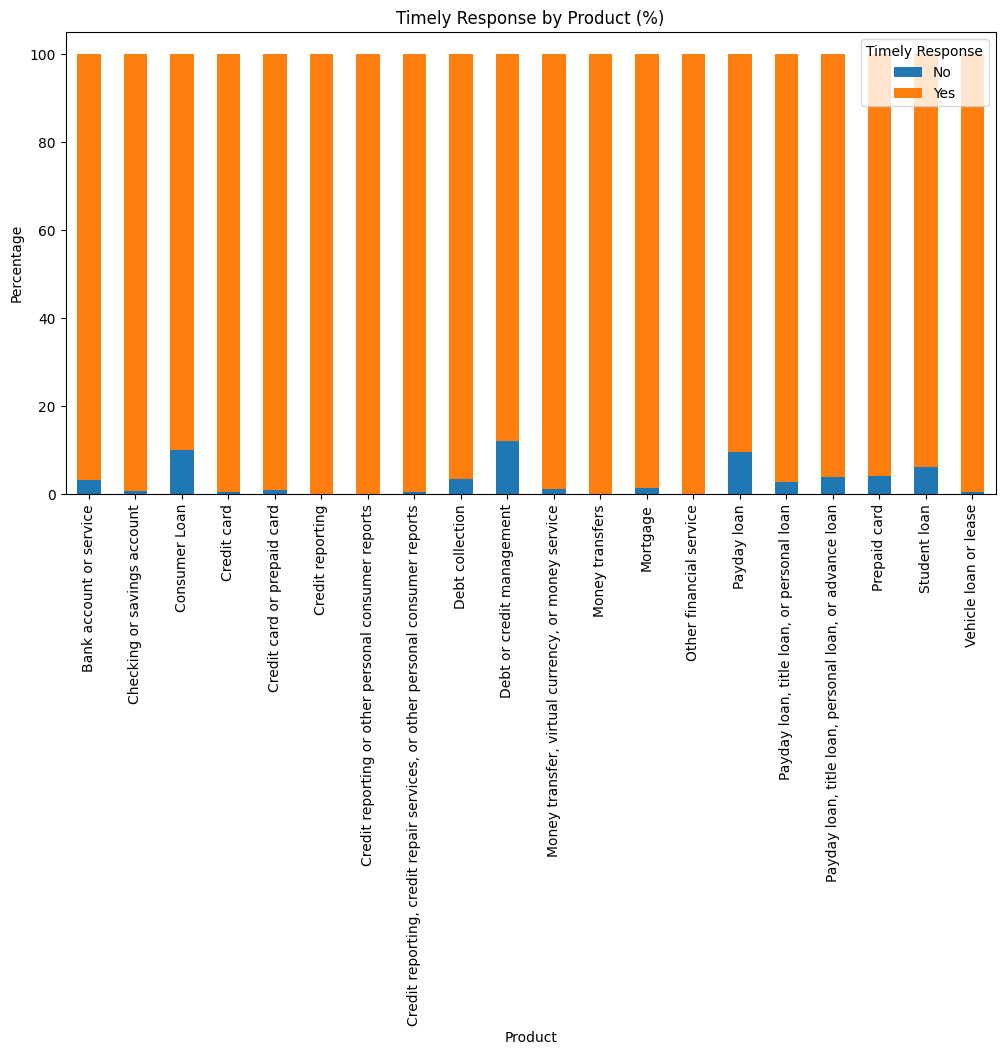

In [41]:
#Timely Response by Product
if all(x in df.columns for x in ['Product', 'Timely response?']):
    timely_tab = pd.crosstab(df['Product'], df['Timely response?'], normalize='index') * 100
    print("\nPercentage of Timely Responses by Product:\n", timely_tab)

    timely_tab.plot(kind='bar', stacked=True, figsize=(12,6))
    plt.title('Timely Response by Product (%)')
    plt.ylabel('Percentage')
    plt.legend(title='Timely Response')
    plt.show()

Consumer disputed?
NaN    97061
No      2310
Yes      629
Name: count, dtype: int64


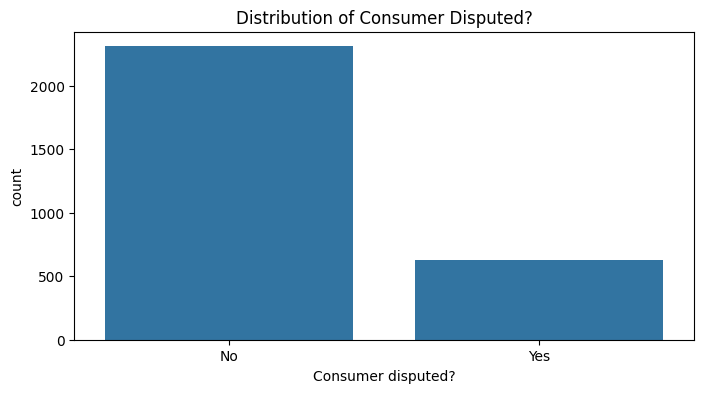

In [42]:
#Consumer Disputed? Analysis

if 'Consumer disputed?' in df.columns:
    print(df['Consumer disputed?'].value_counts(dropna=False))
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x='Consumer disputed?')
    plt.title('Distribution of Consumer Disputed?')
    plt.show()


In [43]:
#  Geospatial analysis by state (basic choropleth)
if 'State' in df.columns:
    state_counts = df['State'].value_counts().reset_index()
    state_counts.columns = ['state', 'count']

    # Load US states geometry data from plotly
    fig = px.choropleth(state_counts,
                        locations='state',
                        locationmode='USA-states',
                        color='count',
                        scope='usa',
                        color_continuous_scale="Viridis",
                        title='Number of Complaints by State')
    fig.show()

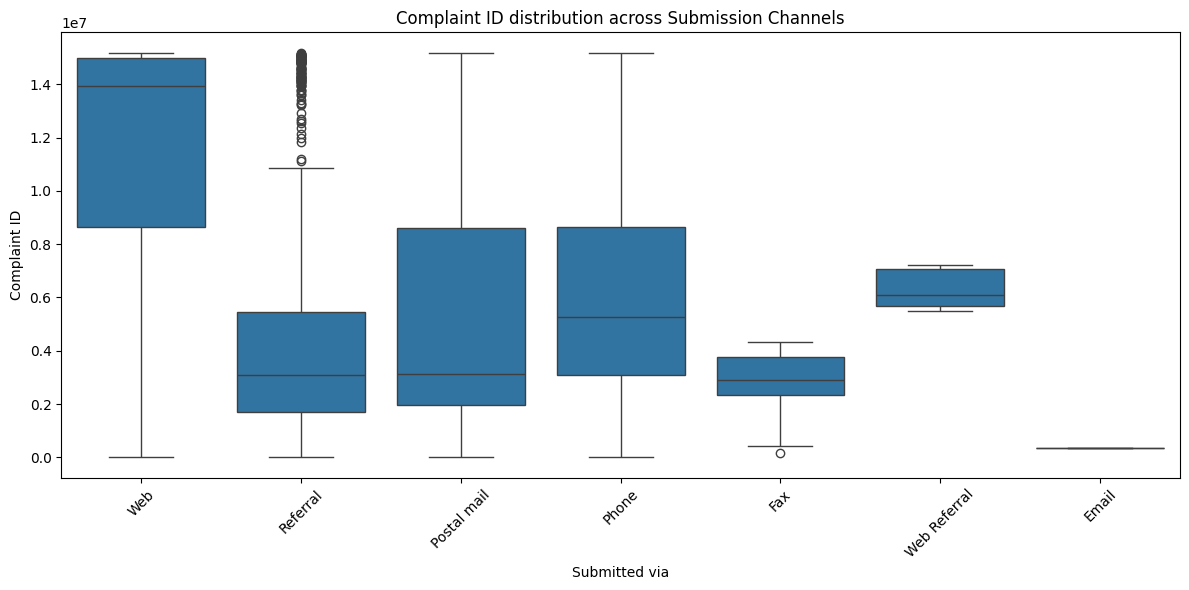

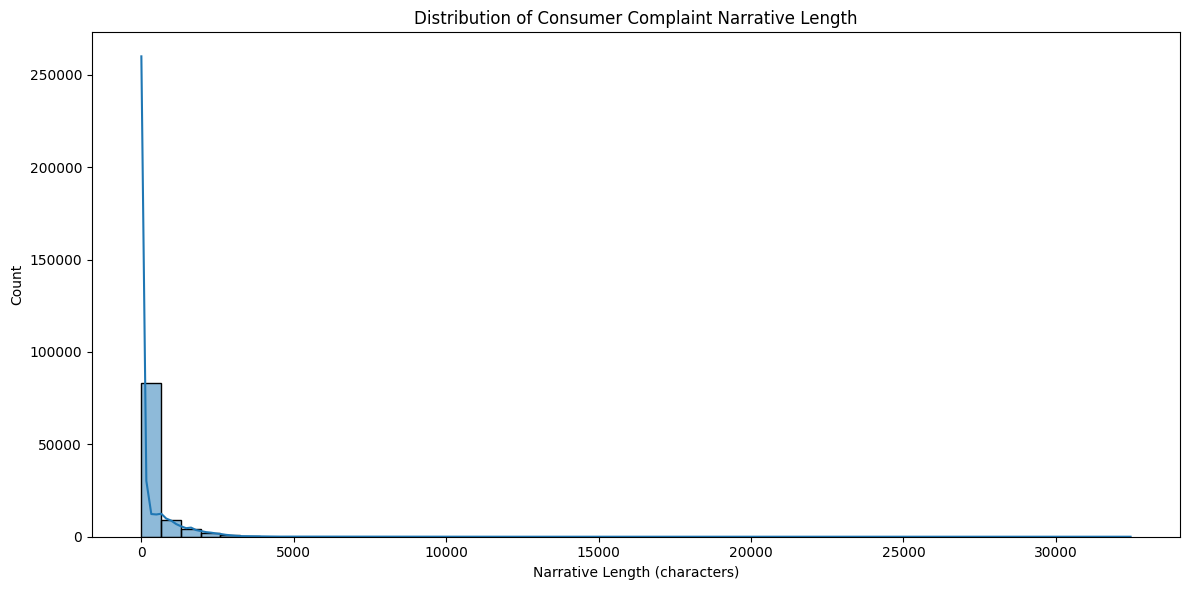

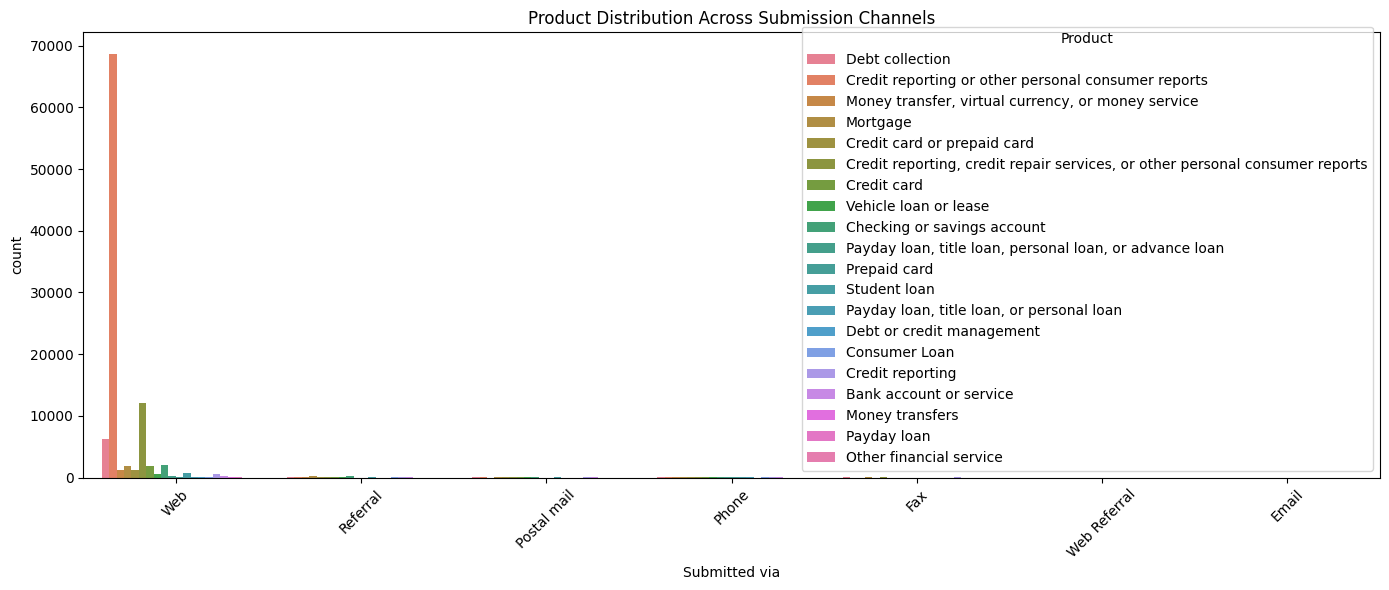

In [44]:


# Boxplot: Complaint ID by Submission Channel
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Submitted via', y='Complaint ID')
plt.title('Complaint ID distribution across Submission Channels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Histogram + KDE: Narrative length
if 'narrative_length' in df.columns:
    plt.figure(figsize=(12,6))
    sns.histplot(df['narrative_length'], bins=50, kde=True)
    plt.title('Distribution of Consumer Complaint Narrative Length')
    plt.xlabel('Narrative Length (characters)')
    plt.tight_layout()
    plt.show()

# Countplot: Product vs Submission Channel
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='Submitted via', hue='Product')
plt.title('Product Distribution Across Submission Channels')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


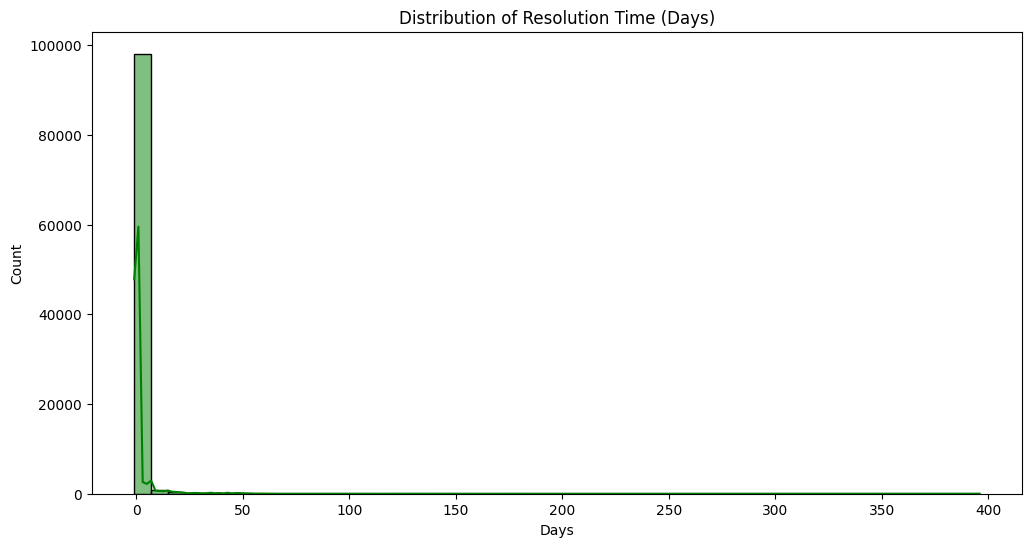

Average resolution time: 0.49 days
Median resolution time: 0.00 days


In [45]:
#Resolution time analysis (days between received and sent to company)
if all(x in df.columns for x in ['Date received', 'Date sent to company']):
    df['Date received'] = pd.to_datetime(df['Date received'], errors='coerce')
    df['Date sent to company'] = pd.to_datetime(df['Date sent to company'], errors='coerce')
    df['resolution_days'] = (df['Date sent to company'] - df['Date received']).dt.days

    plt.figure(figsize=(12,6))
    sns.histplot(df['resolution_days'].dropna(), bins=50, kde=True, color='green')
    plt.title('Distribution of Resolution Time (Days)')
    plt.xlabel('Days')
    plt.show()

    print(f"Average resolution time: {df['resolution_days'].mean():.2f} days")
    print(f"Median resolution time: {df['resolution_days'].median():.2f} days")

In [46]:
#Save cleaned and preprocessed sample ---
df.to_csv('cfpb_sample_eda_cleaned.csv', index=False)
print("Saved sample EDA cleaned dataset.")

Saved sample EDA cleaned dataset.
